Obezite Hakkında:
- Normal kilolu ve obez yetişkinler karşılaştırıldığında, obezitesi olan yetişkinlerin %51'inde hipertansiyon, %21'inde miyokard enfarktüsü, %8'inde iskemik kalp hastalığı, %3,5'inde konjestif kalp yetmezliği ve %3'ünde felç tespit edilmiştir. Bu istatistikler, günümüzde artan obezitenin önüne geçilmesi amacıyla eğitilen modellerin ve elde edilen sonuçların önemini vurgulamaktadır. Bu veriler ışığında, bireyler kendi sağlık durumları hakkında bilgi sahibi olabilir ve olası hastalıkların önlenmesi için gerekli adımları atabilirler.

Kaynak: [https://www.rethinkobesity.global/global/en/cvd/obesity-and-cardiovascular-disease-cvd-morbidity-and-mortality.html]

Veri Seti Hakkında:

- Veri seti; Meksika, Peru ve Kolombiya ülkelerinden 14-61 yaşları arasındaki farklı beslenme alışkanlıkları ve fiziksel durumdaki kişilerde obezite düzeylerini içermektedir.

- 17 kolon ve 2111 satırdan oluşmaktadır.

- Sütunları İnceleme:
    - Demografik Bilgiler:
        - Gender    : Cinsiyet ('female' - 'male')	
        - Age	    : Yaş (14-61)
    - Fiziksel Ölçüm Bilgileri::
        - Height    : Boy
        - Weight    : Kilo	
    - Yaşam Tarzı ve Sağlık Bilgileri:
        - family_history_with_overweight: Ailede Şişmanlık Geçmişi	
        - FAVC      : Fiziksel Aktivite Yapma Sıklığı ('yes' - 'no')
        - SMOKE	    : Sigara İçme Durumu ('yes' - 'no')
        - CALC	    : Alkol Tüketimi ('no', 'Sometimes', 'Frequently', 'Always')
        - MTRANS    : Hareket Tarzı ('Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike')
        - FCVC	    : Haftalık Sebze Tüketme Sıklığı (1:Hiçbir Zaman, 2:Bazen, 3:Herzaman)
        - CAEC	    : Ögünler Arası Yiyecek Tüketimi ('Sometimes', 'Frequently', 'Always', 'no')
        - NCP	    : Ana Öğün Sayısı
        - CH2O	    : Günlük Su Tüketimi
        - SCC	    : Kalori Tüketimi İzleme ('yes' - 'no')
        - FAF	    : Haftada Kaç Gün Fiziksel Aktivite Yaptığı (0:Yok, 1: Düşük, 2: Orta, 3:Yüksek)
        - TUE	    : Teknoloji Kullanım Sıklığı (0:Yok, 1:Düşük, 2:Orta, 3:Yüksek)
        - NObeyesdad: Obezite Durumu
            - 'Normal_Weight': Normal kilolu.
            - 'Overweight_Level_I': Birinci derecede şişmanlık. 
            - 'Overweight_Level_II': İkinci derecede şişmanlık.
            - 'Obesity_Type_I': Tip I obezite. 
            - 'Insufficient_Weight': Yetersiz kilo. 
            - 'Obesity_Type_II': Tip II obezite.
            - 'Obesity_Type_III': Tip III obezite. Bu durum, obezitenin en ciddi seviyesini temsil eder.
           
Veri seti, analiz ve makine öğrenimi için uygun görülmektedir. Kategorik ve sayısal kolonların birlikte bulunması "sınıflandırma problemi" üzerinde çalışmak için daha avantajlıdır. 

Vücut Kitle İndeksi (BMI) Sütunu Ekleme:
- Obezite veri setindeki bilgilerin daha kapsamlı bir şekilde değerlendirilmesine ve obezite ile ilişkili faktörlerin daha iyi anlaşılmasına katkı sağlamak amacıyla eklendi (BMI). Ardından kategorileştirilerek yeni bir kolon daha eklendi (BMI_Obesity_Level). 
- Fiziksel ölçüm kolonları kullanılarak BMI değeri hesaplanabilir. Bu değer bireyin kilosunun (kg), boy uzunluğunun karesine(m²) bölünmesiyle elde edilir. (BMI=kg/m²)
Vücut Kitle İndeksi (BMI) Değerleri:
- 18,5 ve daha düşük değerler = Zayıf
- 18,5 ve 24,9 arasındaki değerler => Normal ağırlıkta
- 25,0 ve 29,9 arasındaki değerler => Kilolu
- 30,0 ve 34,9 arasındaki değerler => 1. derece obezite
- 35,0 ve 39,9 arasındaki değerler => 2. derece obezite
- 40 ve üzerindeki değerler        => 3. derece obezite
Kaynak: [https://www.medicalpark.com.tr/vucut-kitle-indeksi/hg-2345#:~:text=18%2C5%20kg%2Fm2%20ve,aras%C4%B1ndaki%20de%C4%9Ferler%20%3D%201.%20derece%20obezite]

1. Gerekli Kütaphanelerin İmport Edilmesi

In [174]:
# Kütüpnaleri içe aktarma
import pandas as pd #veri aktarma
import numpy as np #array işlemi
import matplotlib.pyplot as plt #görselleştirme
import seaborn as sns #görselleştirme
from sklearn.model_selection import train_test_split #eğitim ve test verisini ayırma
from sklearn.preprocessing import StandardScaler, LabelEncoder #normalizasyon ve label encoding işlemi
from sklearn.metrics import f1_score, accuracy_score, classification_report,ConfusionMatrixDisplay, confusion_matrix #değerlendirme metrikleri
from sklearn.feature_selection import SelectFromModel # belirli eşik değerini geçek özelliklerin seçilmesi
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
import warnings #uyarı

In [175]:
# Uyarıları gizleme
warnings.filterwarnings('ignore') 

2. Veriyi Alma - Input Data

In [176]:
# Veriyi alma ve görme
obesity_df=pd.read_csv("Data/Obesity_DataSet.csv")
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


3. Veriyi Keşfetme ve Inceleme
4. Veri Ön İşleme - Data Prepprocessing

In [177]:
obesity_df.info() #veri seti hakkında bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [178]:
obesity_df.shape #satır sütun sayısı

(2111, 17)

In [179]:
# Her bir sütun için eksik değer sayısı
obesity_df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [180]:
#kolonları float64->int64'e çevirme
obesity_df['Age'] = obesity_df['Age'].astype('int64')
obesity_df['FCVC'] = obesity_df['FCVC'].astype('int64')
obesity_df['NCP'] = obesity_df['NCP'].astype('int64')
obesity_df['CH2O'] = obesity_df['CH2O'].astype('int64')
obesity_df['FAF'] = obesity_df['FAF'].astype('int64')
obesity_df['TUE'] = obesity_df['TUE'].astype('int64')

In [181]:
#BMI değerlerinin kategorileştirilmesi için gerekli fonksiyon
def body_mass_index_calculate(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obesity I'
    elif 35 <= bmi < 40:
        return 'Obesity II'
    else: # 40+
        return 'Obesity III'

In [182]:
#Kilo-Boy sütunları baz alınarak BMI değerlerinin hesaplanması
obesity_df['BMI'] = obesity_df['Weight'] / (obesity_df['Height']**2)
obesity_df['BMI']

0       24.386526
1       24.238227
2       23.765432
3       26.851852
4       28.342381
          ...    
2106    44.901475
2107    43.741923
2108    43.543817
2109    44.071535
2110    44.144338
Name: BMI, Length: 2111, dtype: float64

In [183]:
# Veri seti içinde yer alan BMI sütunundaki her bir değeri fonksiyona göndererek yeni bir kolonun oluşturlamsı
obesity_df['BMI_Obesity_Level'] = obesity_df['BMI'].apply(body_mass_index_calculate)

In [184]:
obesity_df.head() #uygulanmış halini görme


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,BMI_Obesity_Level
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight,24.386526,Normal
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Normal
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight,23.765432,Normal
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I,26.851852,Overweight
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Overweight


In [185]:
#Her kolonda bulunan unique değerleri görme
selected_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad', 'BMI_Obesity_Level']

for column in selected_columns:
    print(f"{column} : {obesity_df[column].unique()}")

Gender : ['Female' 'Male']
family_history_with_overweight : ['yes' 'no']
FAVC : ['no' 'yes']
CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE : ['no' 'yes']
SCC : ['no' 'yes']
CALC : ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
BMI_Obesity_Level : ['Normal' 'Overweight' 'Obesity I' 'Underweight' 'Obesity II'
 'Obesity III']


In [186]:
#object olan sütunların unique sayıları ve en sık görülen değer ve sayısı
obesity_df.describe(include = 'object').T

,count,unique,top,freq
Gender,2111,2,Male,1068
family_history_with_overweight,2111,2,yes,1726
FAVC,2111,2,yes,1866
CAEC,2111,4,Sometimes,1765
SMOKE,2111,2,no,2067
SCC,2111,2,no,2015
CALC,2111,4,Sometimes,1401
MTRANS,2111,5,Public_Transportation,1580
NObeyesdad,2111,7,Obesity_Type_I,351
BMI_Obesity_Level,2111,6,Overweight,566


In [187]:
# Genel veri setine bakmak için
# 'object' tipindeki sütunları seçme
object_columns = obesity_df.select_dtypes(include=['object'])
for i in object_columns:
    print(obesity_df[i].value_counts(),"\n")

Gender
Male      1068
Female    1043
Name: count, dtype: int64 

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64 

FAVC
yes    1866
no      245
Name: count, dtype: int64 

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64 

SMOKE
no     2067
yes      44
Name: count, dtype: int64 

SCC
no     2015
yes      96
Name: count, dtype: int64 

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64 

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64 

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64 

BMI_Obesity_Level
Overweight     566
Obesity I    

5. Veri Görselleştirme - Data Visualization

In [188]:
# round(2): değeri yuvarlamayı 1 ondalık basamağa kadar yapar
# precision=2 : 2 ondalık basamağa kadar göstermesi
# vmax=50 ile, renk skalasının 50 değerine kadar olan aralığı kullanılacağı belirtilir. 
# cmap="Blues" ise mavi tonlarında bir renk haritasını belirtir.
obesity_df.describe().round(2).style.format(precision=2).background_gradient(
    vmax=50, cmap="Blues"
)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,23.97,1.70,86.59,2.21,2.52,1.71,0.73,0.38,29.70
std,6.31,0.09,26.19,0.60,0.83,0.60,0.83,0.58,8.01
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00,13.00
25%,19.00,1.63,65.47,2.00,2.00,1.00,0.00,0.00,24.33
50%,22.00,1.70,83.00,2.00,3.00,2.00,1.00,0.00,28.72
75%,26.00,1.77,107.43,3.00,3.00,2.00,1.00,1.00,36.02
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00,50.81


Yorum: 
- Veri setindeki yaş değerleri ortalama=23.97 yaş etrafında ±6.30 birim kadar dağılmıştır. Bu, yaş değerlerinin geniş bir aralıkta olduğunu ve ortalamadan ne kadar sapma gösterdiğini gösterir.
- Kilo değeri çok fazla değişkenlik göstermiştir.
- Sebze tüketimi (FCVC), ana öğün sıklığı (NCP), su tüketim sıklığı (CH2O), fiziksel aktivite (FAF) , teknoloji kullanımı (TUE) faktörleri, standart sapma değerleri göz önüne alındığında bireyler arasında önemli ölçüde değişmektedir.
- Boy değeri daha az değişkenlik göstermiştir.

<Axes: xlabel='Weight Category', ylabel='Frequency'>

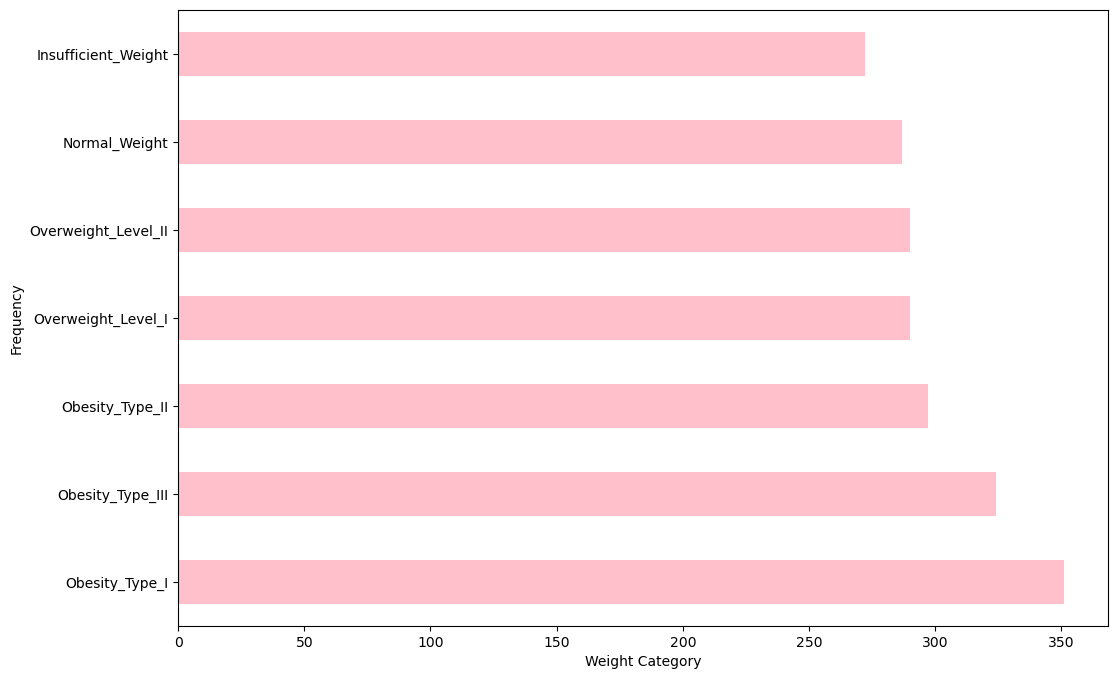

In [189]:
obesity_df['NObeyesdad'].value_counts().plot.barh( color="pink", xlabel='Weight Category', ylabel='Frequency')

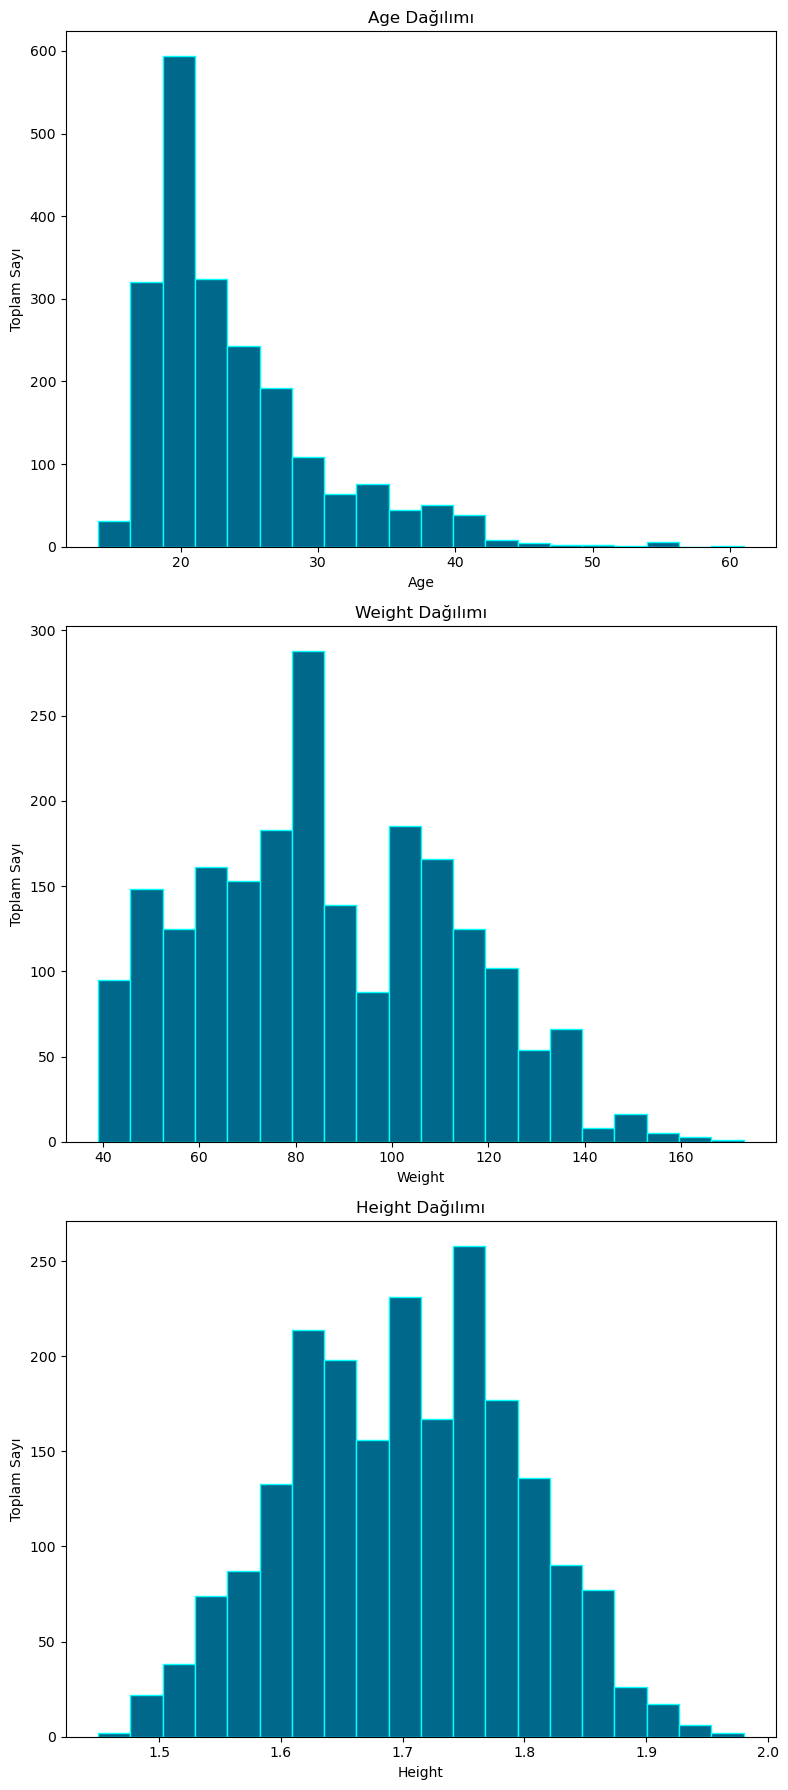

In [190]:
# İlgilenilen sütunlar
selected_columns = ['Age', 'Weight', 'Height']

# Seçilen sütunların histogram çizimi
fig, axes = plt.subplots(nrows=len(selected_columns), figsize=(8, 6 * len(selected_columns)))

for i, column in enumerate(selected_columns):
    axes[i].hist(obesity_df[column], bins=20, color='#00688b', ec='#00ffff')
    axes[i].set_title(f'{column} Dağılımı')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Toplam Sayı')
plt.tight_layout()  # Grafikler arası boşluklar için kullanıldı
plt.show()

Yorum:
- Yaş için 16-40 arasının alınması
- Kilo için 40-150 kg sonrasının silinmesi
- Boy için 1.50 - 1.90 arasının alınması

In [191]:
# 'Age' , 'Weight', 'Height' sütunundaki aykırı değerleri filtrele
obesity_df = obesity_df[(obesity_df['Age'] >= 16) & (obesity_df['Age'] <= 40)]
obesity_df = obesity_df[(obesity_df['Weight'] >= 40) & (obesity_df['Weight'] <= 140)]
obesity_df = obesity_df[(obesity_df['Height'] >= 1.5) & (obesity_df['Height'] <= 1.90)]

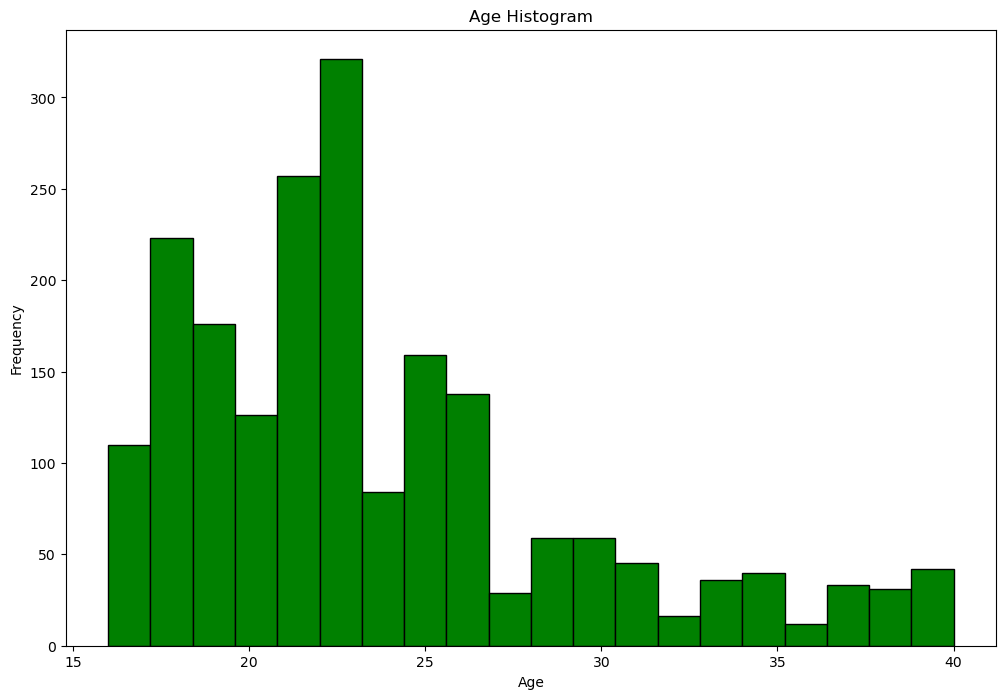

In [192]:
# Age Histogram çizimi
plt.hist(obesity_df['Age'], bins=20, color='green', edgecolor='black')
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

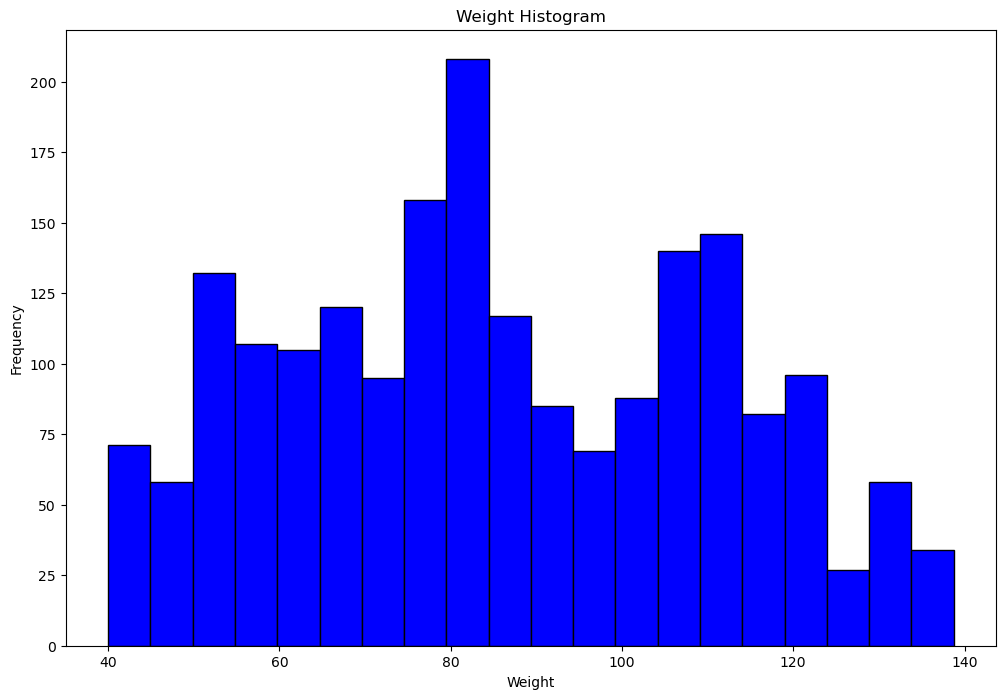

In [193]:
# Weight Histogram çizimi
plt.hist(obesity_df['Weight'], bins=20, color='blue', edgecolor='black')
plt.title('Weight Histogram')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

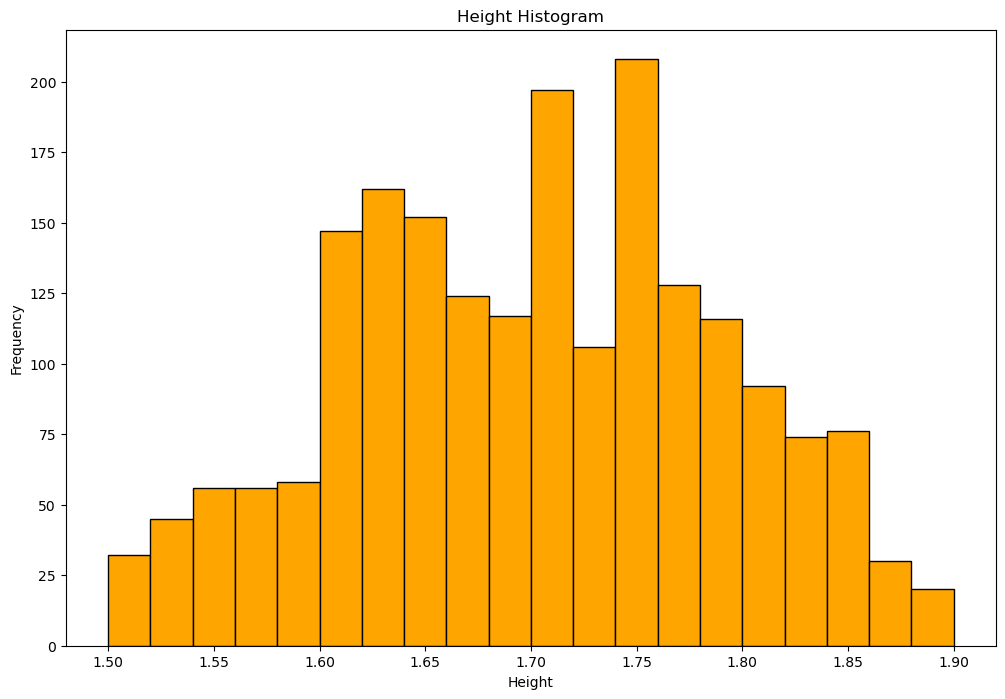

In [194]:
# Weight Histogram çizimi
plt.hist(obesity_df['Height'], bins=20, color='orange', edgecolor='black')
plt.title('Height Histogram')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

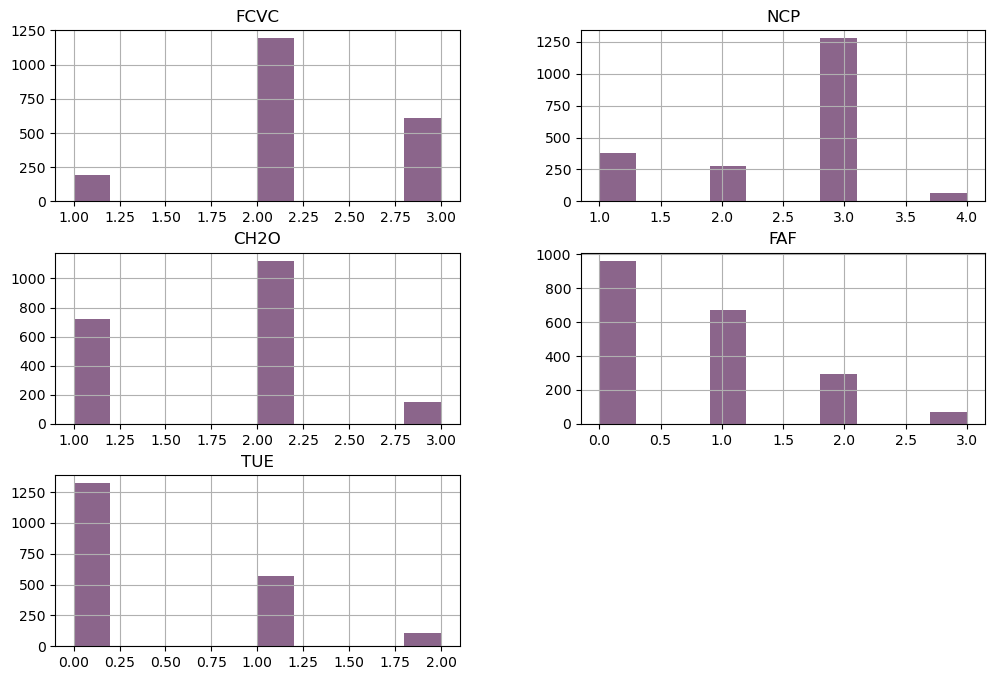

In [195]:
#çizilen grafiklerin varsayılan boyutlarını belirleme
plt.rcParams['figure.figsize'] = (12,8)

#görselleştirilecek kolonların alınması			
viz = obesity_df[['FCVC','NCP','CH2O','FAF', 'TUE']]
viz.hist(color="#8b658b")
plt.show()

Yorum:
- FCVC : Haftalık Sebze Tüketme Sıklığı (1:Hiçbir Zaman, 2:Bazen, 3:Herzaman) 
- NCP  : Ana Öğün Sayısı (1 - 2 - 3 - 4)
- CH2O : Günlük Su Tüketimi (1 - 2 - 3)
- FAF  : Haftada Kaç Gün Fiziksel Aktivite Yaptığı (0:Yok, 1: Düşük, 2: Orta, 3:Yüksek)
- TUE  : Teknoloji Kullanım Sıklığı (0:Yok, 1:Düşük, 2:Orta)

CAEC
Sometimes     1661
Frequently     235
no              51
Always          49
Name: count, dtype: int64

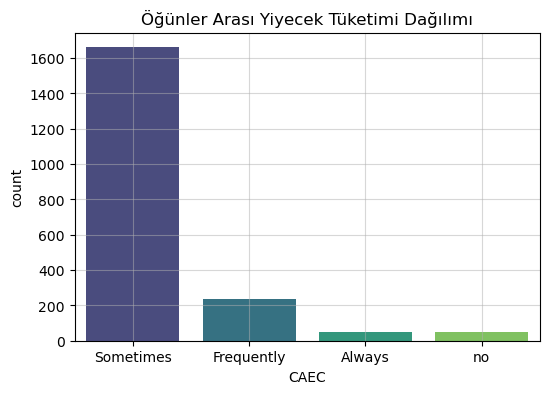

In [196]:
# 'CAEC' sütunundaki her kategorinin sayısı
display(obesity_df['CAEC'].value_counts())

# Görselleştirme
plt.figure(figsize=(6,4))
sns.countplot(data=obesity_df, x=obesity_df['CAEC'], palette="viridis")
plt.title('Öğünler Arası Yiyecek Tüketimi Dağılımı')
plt.grid(alpha=0.5)
plt.show()

CALC
Sometimes     1325
no             607
Frequently      63
Always           1
Name: count, dtype: int64

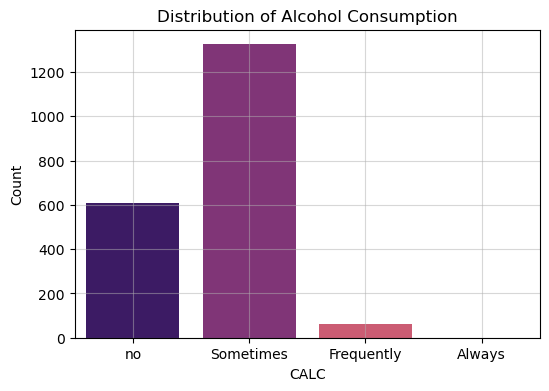

In [197]:
#'CALC' sütunundaki her kategorinin sayısı
display(obesity_df['CALC'].value_counts())

# visualization
plt.figure(figsize=(6,4))
sns.countplot(data=obesity_df, x=obesity_df['CALC'], palette="magma")
plt.ylabel('Count')
plt.title('Distribution of Alcohol Consumption')
plt.grid(alpha=0.5)
plt.show()

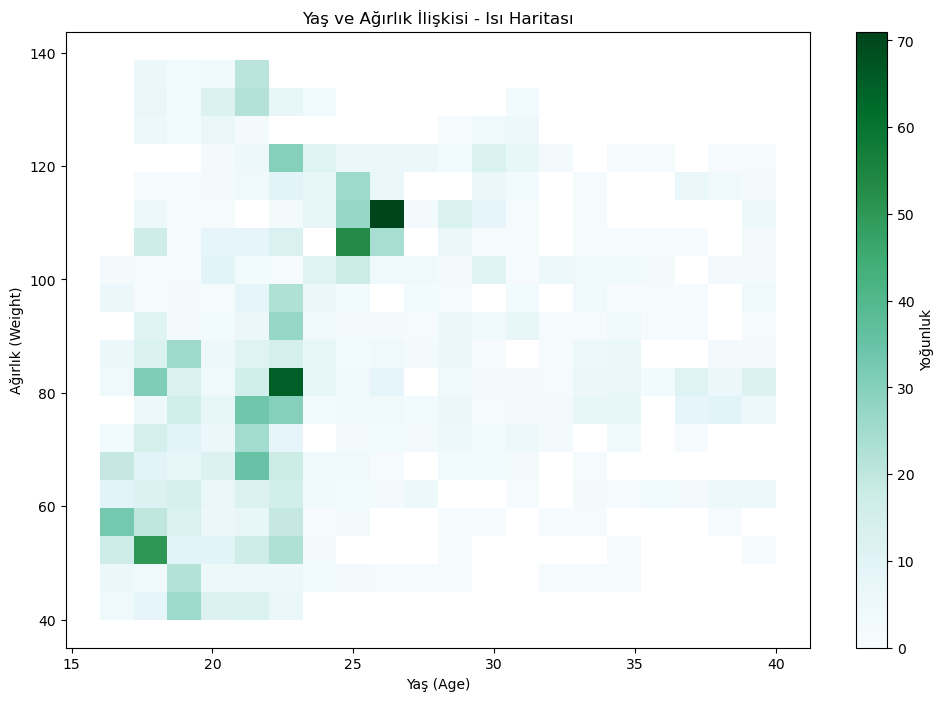

In [198]:
# ısı haritası
heatmap = sns.histplot(data=obesity_df, x="Age", y="Weight", bins=20, cbar=True, cmap="BuGn")

# Eksen etiketleri ve başlık ekleyin
plt.xlabel("Yaş (Age)")
plt.ylabel("Ağırlık (Weight)")
plt.title("Yaş ve Ağırlık İlişkisi - Isı Haritası")

# Renk çubuğunu
cbar = heatmap.collections[0].colorbar
cbar.set_label("Yoğunluk")

# Görseli göster
plt.show()

Yorum:
- Daha yoğun olan kısımlarda daha fazla veri bulunmaktadır. Dolayısıyla 25-30 yaşına kadar ve ağırlığı 120'nin altında olan kısımlarda daha fazla birey bulunmaktadır.

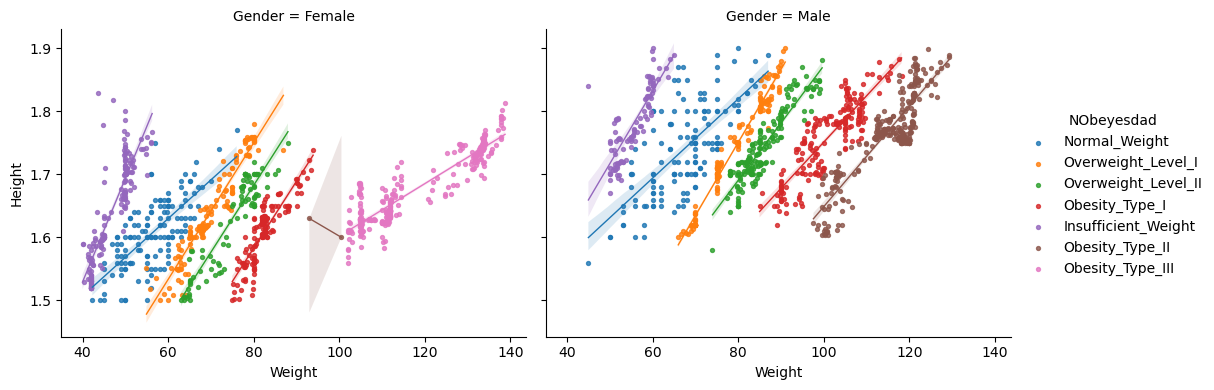

In [200]:
# Obezite durumlarına göre cinsiyet dağılımı
sns.lmplot(
    data=obesity_df,
    x="Weight",
    y="Height",
    col="Gender",
    height=4,
    aspect=1.3,
    hue="NObeyesdad",
    scatter_kws={"s": 8},
    line_kws={"linewidth": 1},
    palette="tab10",
)
plt.show()

Yorum:
- Obezite III en fazla kadınlarda, Obezite II ise erkeklerde görülmektedir. 

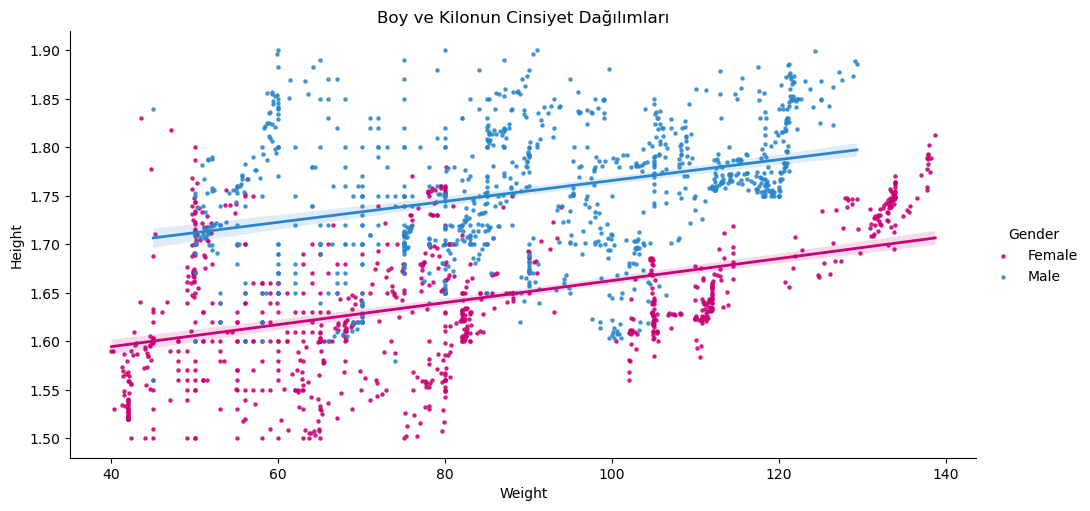

In [201]:
# Boy ve Kilonun, Cinsiyet Üzerindeki Dağılımı
sns.lmplot(
    data=obesity_df,
    x="Weight",
    y="Height",
    height=5,
    aspect=2,
    hue="Gender",
    palette={"Female": "#c90076", "Male": "#2986cc"},
    scatter_kws={"s": 5},
    line_kws={"linewidth": 2},
)
plt.title("Boy ve Kilonun Cinsiyet Dağılımları")
plt.show()

Yorum:
- 135 kilodan sonra kadın bireyler daha fazla
- 1.70'den sonra erkek bireyler daha fazla
- Kadınlar daha çok 40-80 kilo ve boyları 1.50-1.70 arası
- Erkekler daha çok 80-120 kilo ve boyları 1.65-1.90 arası

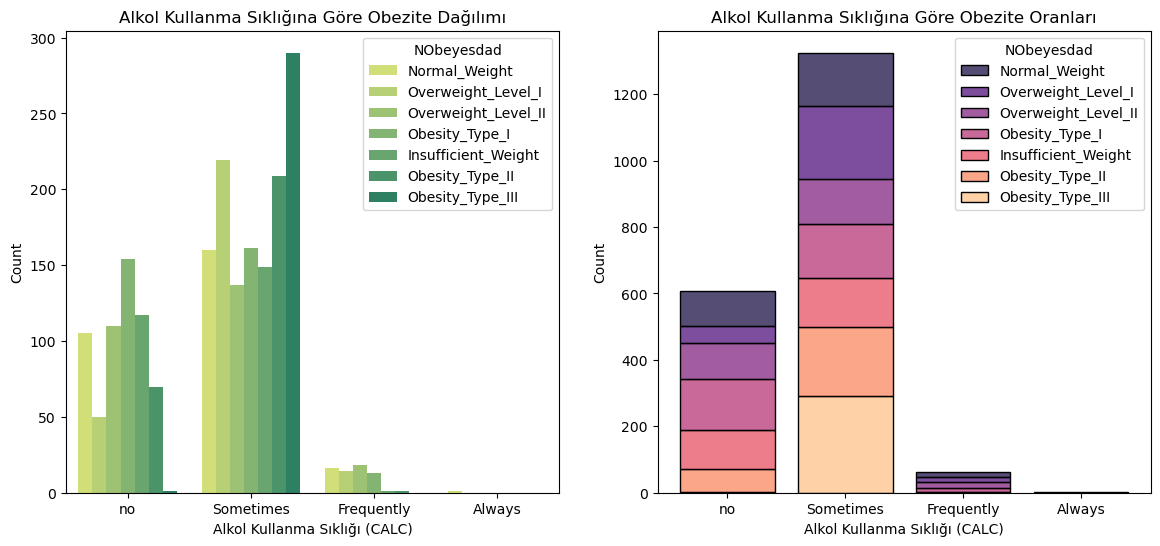

In [219]:
# Çizim için subplotlar oluşturun
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Alkol kullanma sıklığına göre vücut kitle indeksi dağılımını gösteren countplot
sns.countplot(data=obesity_df, x='CALC', hue='NObeyesdad', ax=axes[0], palette="summer_r")
axes[0].set_title('Alkol Kullanma Sıklığına Göre Obezite Dağılımı')
axes[0].set_xlabel('Alkol Kullanma Sıklığı (CALC)')
axes[0].set_ylabel('Count')
axes[0].legend(title='NObeyesdad')

# Alkol kullanma sıklığına göre vücut kitle indeksi oranlarını gösteren stacked bar plot
sns.histplot(data=obesity_df, x='CALC', hue='NObeyesdad', multiple="stack", shrink=0.8, ax=axes[1], palette="magma")
axes[1].set_title('Alkol Kullanma Sıklığına Göre Obezite Oranları')
axes[1].set_xlabel('Alkol Kullanma Sıklığı (CALC)')
axes[1].set_ylabel('Count')

# Grafikleri gösterin
plt.show()

<Axes: xlabel='Age', ylabel='BMI_Obesity_Level'>

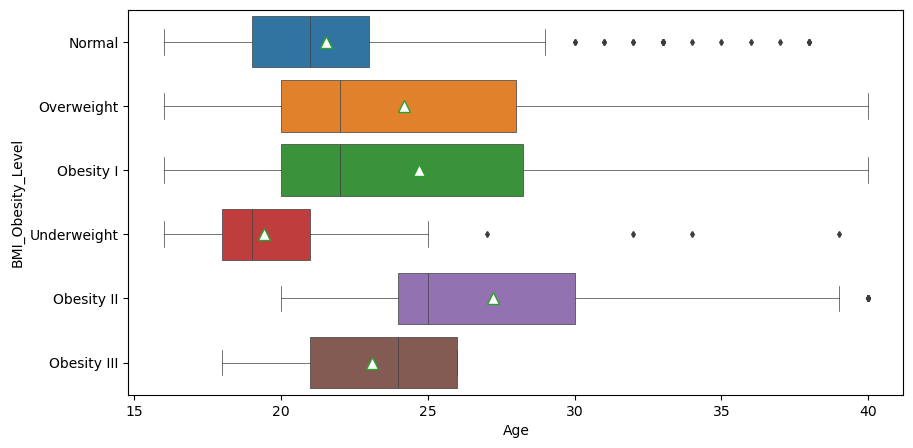

In [136]:
# BMI indeksine göre obezite seviyesi
plt.figure(figsize=(10, 5))

sns.boxplot(
    data=obesity_df,
    x="Age",
    y="BMI_Obesity_Level",
    showmeans=True, #ortalama
    linewidth=0.5, #çizgi kalınlığı
    flierprops={"markersize": 3}, #aykırı değerler
    palette="tab10", #renk
    meanprops={ #ortalama işaretinin ayarları
        "markerfacecolor": "white",
        "markersize": 8,
    },
)

Yorum:
- Normal: Ortalama yaş 20-25 arasında
- Şişman: Ortalama yaş 25'e daha yakın
- Zayıf: 20 yaş altı veya 20 yaşına daha yakın
- Obezite I: Ortalama yaş 25'e daha yakın
- Obezite II: Ortalama yaş 25-30 arasında
- Obezite III: Ortalama yaş 20-25 arasında

6. Label Encoder ve Mapping İşlemi

In [137]:
#Düzeylerde yanlış sıralama yapıldığı görülmüştür bu sebeple manuel olarak map işlemi yapıldı

#cinsiyet
label_mapping_gender = {
    'Female': 0,
    'Male': 1
}
obesity_df['Gender'] = obesity_df['Gender'].map(label_mapping_gender)

# family_history_with_overweight : ['yes' 'no']
label_mapping_family = {
    'no': 0,
    'yes': 1
}
obesity_df['family_history_with_overweight'] = obesity_df['family_history_with_overweight'].map(label_mapping_family)

# Ögünler Arası Yiyecek Tüketimi
label_mapping_caec = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}
obesity_df['CAEC'] = obesity_df['CAEC'].map(label_mapping_caec)

# Alkol Tüketimi
label_mapping_calc = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}
obesity_df['CALC'] = obesity_df['CALC'].map(label_mapping_calc)

# Vücut Kitle İndeksi
label_mapping_BMI = {
    'Underweight': 0,
    'Normal': 1,
    'Overweight': 2,
    'Obesity I': 3,
    'Obesity II': 4,
    'Obesity III': 5
}
obesity_df['BMI_Obesity_Level'] = obesity_df['BMI_Obesity_Level'].map(label_mapping_BMI)

# Obezite Durumu
label_mapping_nobeyesdad = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
obesity_df['NObeyesdad'] = obesity_df['NObeyesdad'].map(label_mapping_nobeyesdad)

# Hareket Tarzı
label_mapping_mtrans = {
    'Public_Transportation': 0,
    'Walking': 1,
    'Automobile': 2,
    'Motorbike': 3,
    'Bike': 4
}
obesity_df['MTRANS'] = obesity_df['MTRANS'].map(label_mapping_mtrans)


In [139]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,BMI_Obesity_Level
0,0,21,1.62,64.0,1,no,2,3,1,no,2,no,0,1,0,0,1,24.386526,1
1,0,21,1.52,56.0,1,no,3,3,1,yes,3,yes,3,0,1,0,1,24.238227,1
2,1,23,1.80,77.0,1,no,2,3,1,no,2,no,2,1,2,0,1,23.765432,1
3,1,27,1.80,87.0,0,no,3,3,1,no,2,no,2,0,2,1,2,26.851852,2
4,1,22,1.78,89.8,0,no,2,1,1,no,2,no,0,0,1,0,3,28.342381,2


In [140]:
# Label Encoding İşlemi
# no-yes şeklinde no:0 yes:1
label_encoder = LabelEncoder()
columns_to_encode = ['FAVC', 'SMOKE', 'SCC']

for column in columns_to_encode:
    obesity_df[column] = label_encoder.fit_transform(obesity_df[column])

In [141]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,BMI_Obesity_Level
0,0,21,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,0,1,24.386526,1
1,0,21,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,0,1,24.238227,1
2,1,23,1.80,77.0,1,0,2,3,1,0,2,0,2,1,2,0,1,23.765432,1
3,1,27,1.80,87.0,0,0,3,3,1,0,2,0,2,0,2,1,2,26.851852,2
4,1,22,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,0,3,28.342381,2


7. Verinin Normalize Edilmesi

In [146]:
x_data=obesity_df.drop(['NObeyesdad'], axis=1) # son kolon hariç tüm satırlar
x_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,BMI_Obesity_Level
0,0,21,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,0,24.386526,1
1,0,21,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,0,24.238227,1
2,1,23,1.80,77.0,1,0,2,3,1,0,2,0,2,1,2,0,23.765432,1
3,1,27,1.80,87.0,0,0,3,3,1,0,2,0,2,0,2,1,26.851852,2
4,1,22,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,0,28.342381,2


In [147]:
y_data=obesity_df['NObeyesdad'] # sadece sonuç kolonu
y_data.head(10)

0    1
1    1
2    1
3    2
4    3
5    1
6    1
7    1
8    1
9    1
Name: NObeyesdad, dtype: int64

In [148]:
#Verileri normalize etme
x_data=StandardScaler().fit(x_data).transform(x_data.astype(float))
print(x_data)

[[-1.02640048 -0.4702188  -0.88804486 ... -0.5517636  -0.64081228
  -0.93252308]
 [-1.02640048 -0.4702188  -2.00722236 ... -0.5517636  -0.65967513
  -0.93252308]
 [ 0.97427858 -0.10951291  1.12647466 ... -0.5517636  -0.71981203
  -0.93252308]
 ...
 [-1.02640048 -0.28986586  0.59157496 ... -0.5517636   1.79588852
   1.66798836]
 [-1.02640048  0.07084003  0.44881268 ... -0.5517636   1.86301142
   1.66798836]
 [-1.02640048 -0.10951291  0.44194093 ... -0.5517636   1.8722715
   1.66798836]]


8. Veri Bölme - Data Splitting

In [149]:
#Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1596, 18) (1596,)
Test set: (400, 18) (400,)


9. Sınıflandırma - Modelinin Uygulanması

Neden SVM?
- Bellek açısından verimlidir.
- Veri seti küçük olduğunda da iyi performans gösterebilir ve aşırı uyuma (overfitting) eğilimli değildir.
- Çeşitlidir. Farklı kernel fonksiyonları kullanılarak karar verilebilir.
- Aykırı değerlere karşı dirençlidir. Bu sebeple aykırı değerler genellikle genel performansı etkilemez.

Neden RF?
- Birçok karar ağacının bir araya getirilmesiyle daha güçlü model oluşturulur.
- Genellikle aşırı uyma eğiliminde olan karar ağaçlarına karşı dirençlidir.
- Çeşitli veritipleriyle uyumludur. Sayısal ve kategorik verilerle çalışır.

Neden KNN?
- Hızlı ve basittir. Çünkü sadece eğitim verilerini belleğe alır ve sınıflandırma yapar.
- Hiperparametrelerin seçimi konusunda esneklik sağlar.(ANOVA (f_classif) skoruna dayalı olarak en iyi k özellik seçimi)
- Çoklu sınıflandırma problemlerinde etkilidir.


In [151]:
# RandomForestClassifier modelini oluşturma
rf_model = RandomForestClassifier()

# SelectFromModel sınıfını kullanarak özellik seçimi yapma
sfm = SelectFromModel(rf_model, threshold=0.1)

# Özellik seçimini eğitim veri kümesine uygulama
x_train_selected_rf = sfm.fit_transform(x_train, y_train)

# Modeli eğitme
rf_model.fit(x_train_selected_rf, y_train)

# Özellik seçimini test veri kümesine uygulama
x_test_selected_rf = sfm.transform(x_test)

# Modelin tahminini
y_pred_rf = rf_model.predict(x_test_selected_rf)

# F1 skoru ve Accuracy skoru hesaplama
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)

print("F1 Score:", f1_rf)
print("Accuracy Score:", accuracy_score_rf)

#threshold=0.2 ike sonuc %93

F1 Score: 0.9825709316668688
Accuracy Score: 0.9825


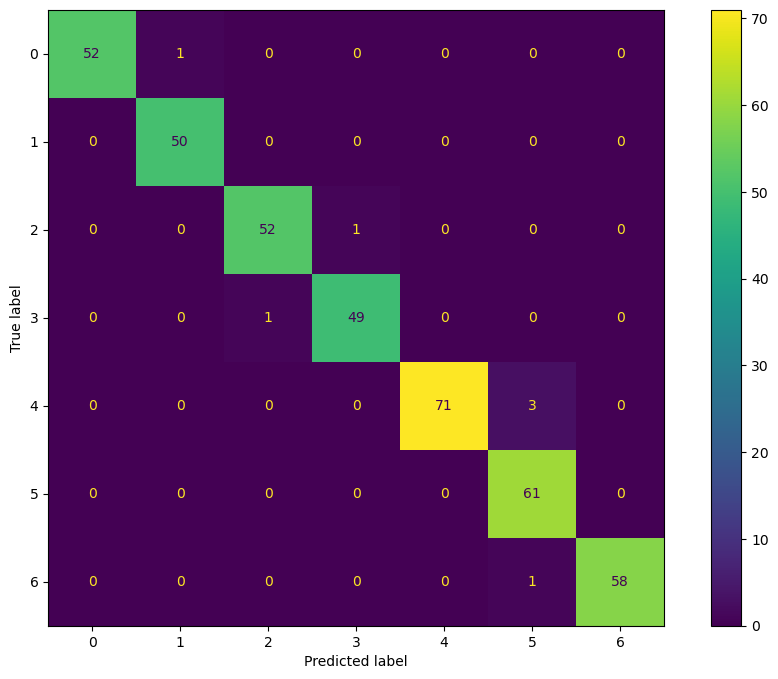

In [157]:
# Random Forest için CM
confusion_matrix_rf=confusion_matrix(y_test, y_pred_rf)

# ConfusionMatrixDisplay'i oluşturma
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)

# Matrisi çizdirme
cm_display.plot()
plt.show()

In [158]:
# RandomForestClassifier modelini oluşturma
rf_model = RandomForestClassifier()

# SelectFromModel sınıfını kullanarak özellik seçimi yapma
sfm = SelectFromModel(rf_model, threshold=0.2)

# Özellik seçimini eğitim veri kümesine uygulama
x_train_selected_rf = sfm.fit_transform(x_train, y_train)

# Modeli eğitme
rf_model.fit(x_train_selected_rf, y_train)

# Özellik seçimini test veri kümesine uygulama
x_test_selected_rf = sfm.transform(x_test)

# Modelin tahminini
y_pred_rf = rf_model.predict(x_test_selected_rf)

# F1 skoru ve Accuracy skoru hesaplama
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)

print("F1 Score:", f1_rf)
print("Accuracy Score:", accuracy_score_rf)

F1 Score: 0.9379890368612912
Accuracy Score: 0.9375


In [152]:
#SelectKBest sınıfını kullanarak ANOVA (f_classif) skoruna dayalı olarak en iyi k özellik seçimi yapıldı.

# KNeighborsClassifier modelini oluşturma
knn_model = KNeighborsClassifier()

# SelectKBest kullanarak özellik seçimi
k_best = SelectKBest(f_classif, k='all')
x_train_selected_knn = k_best.fit_transform(x_train, y_train)
x_test_selected_knn = k_best.transform(x_test)

# Modeli eğitme
knn_model.fit(x_train_selected_knn, y_train)

# Tahmin
y_pred_knn = knn_model.predict(x_test_selected_knn)

# F1 Score ve Accuray Score hesaplama
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')  # average parametresini uygun bir değerle değiştirmelisiniz
accuracy_score_knn = accuracy_score(y_test, y_pred_knn)

print("F1 Score:", f1_knn)
print("Accuracy Score:", accuracy_score_knn)

F1 Score: 0.842744847904633
Accuracy Score: 0.8475


In [153]:
# SVM modelini oluşturma
svm_model = SVC(kernel='linear', C=1.0)

# Modeli eğitme
svm_model.fit(x_train, y_train)

# Tahmin
y_pred_svm = svm_model.predict(x_test)  # Burada y_test kullanılmalı

# F1 Score ve Accuracy Score hesaplama
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')  # average parametresini uygun bir değerle değiştirmelisiniz
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)

print("F1 Score:", f1_svm)
print("Accuracy Score:", accuracy_score_svm)
#kernel=rbf seçildiğinde sonuç %77
#kernel=poly ve degree=3 ise sonuç %80 burada en iyi sonucu linear vermiştir.

F1 Score: 0.9749273007440117
Accuracy Score: 0.975


In [156]:
# precision, recall and F1 score
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        53
           1       0.56      0.44      0.49        50
           2       0.83      0.75      0.79        53
           3       0.80      0.88      0.84        50
           4       0.93      0.92      0.93        74
           5       0.94      0.97      0.95        61
           6       1.00      0.98      0.99        59

    accuracy                           0.85       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.84      0.85      0.84       400



KNN modelinin doğruluğunu arttırmak aşağıdaki kod yazılmış ve en iyi random state değeri yazılmıştır.

In [163]:
#En uygun Random State değerini bulma 
score=0.0 #başlangıçta 0 ve döngüyü kontrol eder
max=0.0 # başlangıçta 0 ve en iyi sonucu yazdırmak için tutulur
rdm_states=0 # random state değerinin başlangıcı
while(score<=0.90):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=(rdm_states))
    knn_model = KNeighborsClassifier() # model oluşturma
    knn_model.fit(x_train, y_train) # fit etme
    y_pred = knn_model.predict(x_test) # tahmin 
    score=f1_score(y_test, y_pred, average='weighted') #F1 score'a göre izleme yap
    if(score>max): #bulunan f1 score max değerinden büyükse
        max=score # score değerini max'a atadı
        rdmValue=rdm_states
 
        #print("f1 score:",max,"en iyi rdm=",rdmValue)
    #print("f1_score:",f1_score(y_test, y_pred, average='weighted')) # test
    print("accuracy:",accuracy_score(y_test, y_pred)) # test
    #print("Score: ",score)
    print("Mevcut Random Stade:", rdm_states, "En İyi Doğruluk Değeri: ", max, "En İyi Random State", rdmValue)
    rdm_states=rdm_states+1

accuracy: 0.8275
Mevcut Random Stade: 0 En İyi Doğruluk Değeri:  0.8212320222588352 En İyi Random State 0
accuracy: 0.8675
Mevcut Random Stade: 1 En İyi Doğruluk Değeri:  0.8656628324130062 En İyi Random State 1
accuracy: 0.8375
Mevcut Random Stade: 2 En İyi Doğruluk Değeri:  0.8656628324130062 En İyi Random State 1
accuracy: 0.83
Mevcut Random Stade: 3 En İyi Doğruluk Değeri:  0.8656628324130062 En İyi Random State 1
accuracy: 0.835
Mevcut Random Stade: 4 En İyi Doğruluk Değeri:  0.8656628324130062 En İyi Random State 1
accuracy: 0.8325
Mevcut Random Stade: 5 En İyi Doğruluk Değeri:  0.8656628324130062 En İyi Random State 1
accuracy: 0.85
Mevcut Random Stade: 6 En İyi Doğruluk Değeri:  0.8656628324130062 En İyi Random State 1
accuracy: 0.805
Mevcut Random Stade: 7 En İyi Doğruluk Değeri:  0.8656628324130062 En İyi Random State 1
accuracy: 0.84
Mevcut Random Stade: 8 En İyi Doğruluk Değeri:  0.8656628324130062 En İyi Random State 1
accuracy: 0.8225
Mevcut Random Stade: 9 En İyi Doğrulu

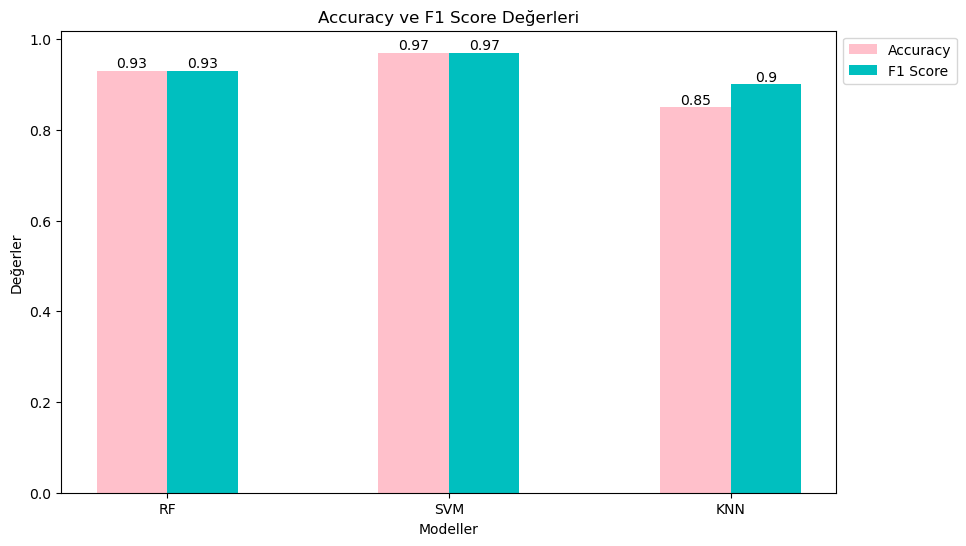

In [240]:
# Veriler
accuracy_values = [0.93, 0.97, 0.85]
f1_score_values = [0.93, 0.97, 0.90]
modeller = ['RF', 'SVM', 'KNN']
# Genişliği ayarlamak için bir figür oluşturun
fig, ax = plt.subplots(figsize=(10, 6))

# Bar genişliği
bar_width = 0.25

# X eksenindeki konumları belirleme
index = np.arange(len(modeller))

# Barları çizin
bar1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy', color='pink')
bar2 = ax.bar(index + bar_width, f1_score_values, bar_width, label='F1 Score', color='c')

# isimlendirmeler
ax.set_xlabel('Modeller')
ax.set_ylabel('Değerler')
ax.set_title('Accuracy ve F1 Score Değerleri')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(modeller)

# Barların üzerine değerleri ekleme
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Legend'ı dışa yerleştirin
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Grafikleri gösterin
plt.show()